## Bank Customer Segmentation 

**OBJECTIVE**:

Grouping specific kind of customers using various features available in the dataset such transaction frequency,amount,tenure,credit card limit etc.

**About Dataset**

The dataset is downloaded from Kaggle.com. 

The dataset has 8950 entries and 18 features.

**INDEX**

* Import Libraries
* Data Overview
* Visualize and Explore Dataset
* Data Preparation
* Choosing optimal K using Elbow Method
* PCA

### Import Libraries

In [1]:
import numpy as np # Numerical Analysis
import pandas as pd # Data Manipulation
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



### Data Overview

* The dataset has 8950 row entries and 18 feature.
* 313 data are missing from MINIMUM_PAYMENTS column and 1 data is missing from CREDIT_LIMIT column.

* CUSTID: Identification of Credit Card holder 
* BALANCE: Balance amount left in customer's account to make purchases
*BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
*PURCHASES: Amount of purchases made from account
*ONEOFFPURCHASES: Maximum purchase amount done in one-go
*INSTALLMENTS_PURCHASES: Amount of purchase done in installment
*CASH_ADVANCE: Cash in advance given by the user
*PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
*ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
*PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
*CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
*CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
*PURCHASES_TRX: Number of purchase transactions made
*CREDIT_LIMIT: Limit of Credit Card for user
*PAYMENTS: Amount of Payment done by user
*MINIMUM_PAYMENTS: Minimum amount of payments made by user  
*PRC_FULL_PAYMENT: Percent of full payment paid by user
*TENURE: Tenure of credit card service for user*

In [2]:
df=pd.read_csv(r'C:\Users\APOORVA\Desktop\MACHINE LEARNING\PROJECTS\Bank Customer Segmentation\marketing_data.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.shape

(8950, 18)

In [5]:
print('Number of rows :',df.shape[0])
print('Number of columns :',df.shape[1])


Number of rows : 8950
Number of columns : 18


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


* Mean balance is $1564 

* Balance frequency is frequently updated on average ~0.9

* Purchases average is $1000

* One off purchase average is `~$ 600

* Average purchases frequency is around 0.5

* average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low

* Average credit limit ~ 4500
* Percent of full payment is 15%
* Average tenure is 11 years

In [8]:
#Customer who made the maximim "ONEOFF_PURCHASES"
df.ONEOFF_PURCHASES.max()

40761.25

In [9]:
df[df.ONEOFF_PURCHASES==40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [10]:
# Customer who made the maximum cash advance transaction
df.CASH_ADVANCE.max()

47137.21176

In [11]:
df[df.CASH_ADVANCE==47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


### VISUALIZE AND EXPLORE DATASET

In [12]:
df.isna().apply(pd.value_counts).T

,False,True
CUST_ID,8950.0,NaN
BALANCE,8950.0,NaN
BALANCE_FREQUENCY,8950.0,NaN
PURCHASES,8950.0,NaN
ONEOFF_PURCHASES,8950.0,NaN
INSTALLMENTS_PURCHASES,8950.0,NaN
CASH_ADVANCE,8950.0,NaN
PURCHASES_FREQUENCY,8950.0,NaN
ONEOFF_PURCHASES_FREQUENCY,8950.0,NaN
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,NaN


<AxesSubplot:>

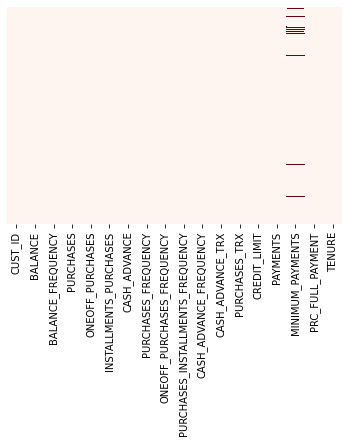

In [13]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Reds")

**FILLING THE MISSING VALUES**

In [14]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [15]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)

<AxesSubplot:>

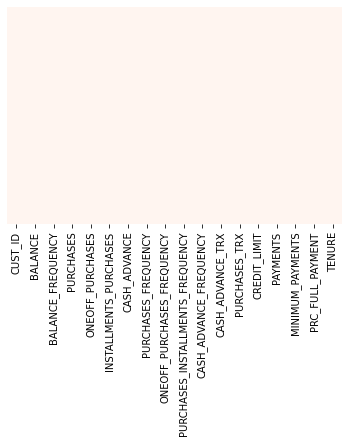

In [16]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Reds")

In [17]:
df.isna().apply(pd.value_counts).T

,False
CUST_ID,8950
BALANCE,8950
BALANCE_FREQUENCY,8950
PURCHASES,8950
ONEOFF_PURCHASES,8950
INSTALLMENTS_PURCHASES,8950
CASH_ADVANCE,8950
PURCHASES_FREQUENCY,8950
ONEOFF_PURCHASES_FREQUENCY,8950
PURCHASES_INSTALLMENTS_FREQUENCY,8950


In [18]:
# Let's see if we have duplicated entries in the data
df.duplicated().sum()

0

### Data Preparation

In [19]:
df=df.drop(['CUST_ID'],axis=1)

In [20]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [21]:
len(df.columns)

17

In [22]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

C:\Users\APOORVA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\APOORVA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\APOORVA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

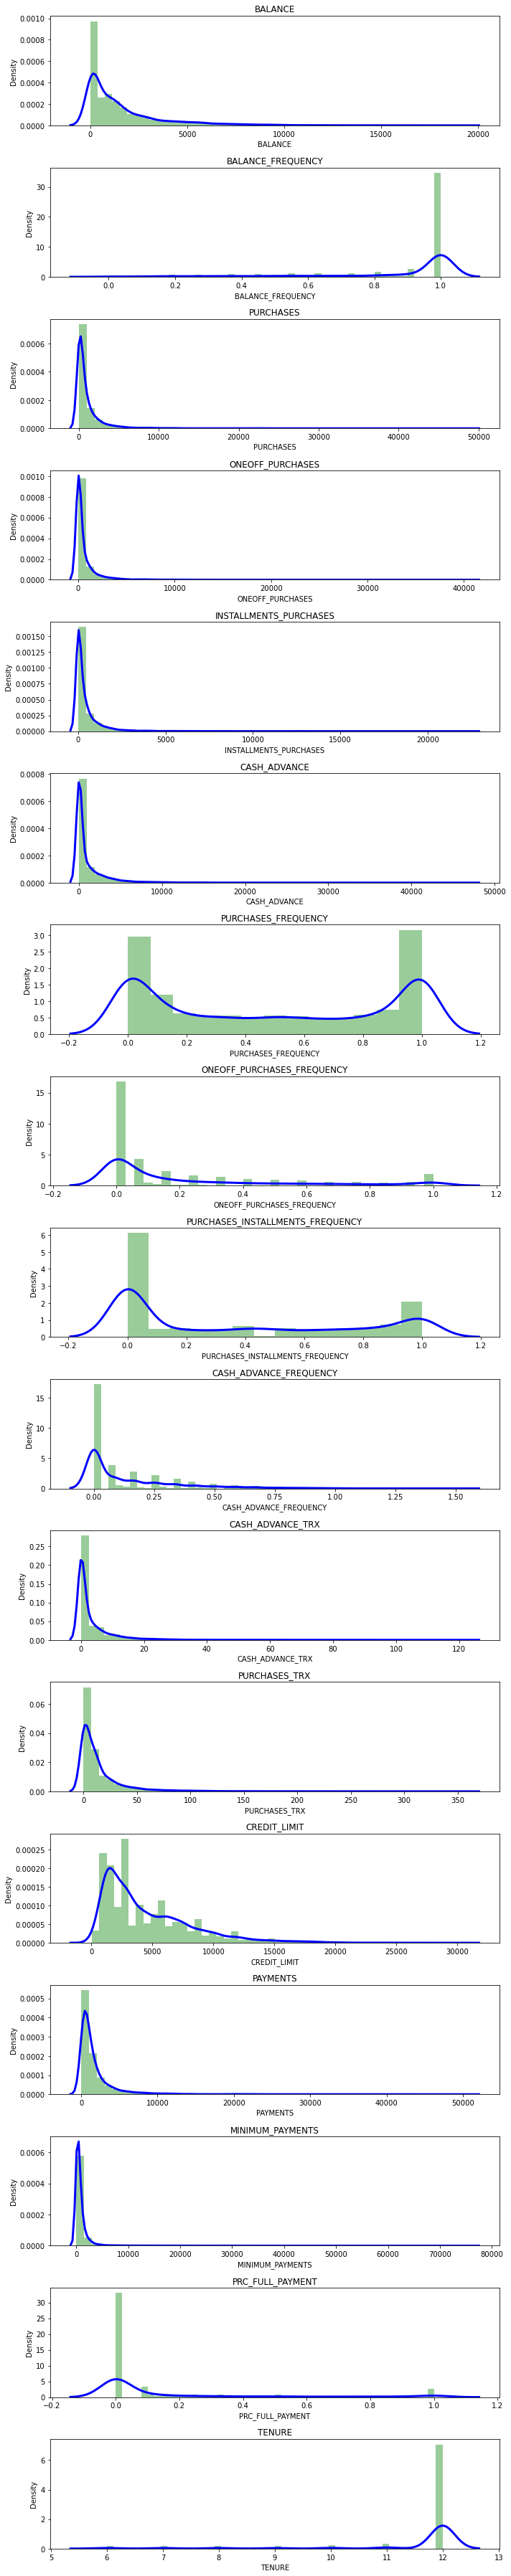

In [24]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(df.columns[i])

plt.tight_layout()
  

* Mean of balance is $1500

* Balance_Frequency for most customers is updated frequently ~1

* For 'PURCHASES_FREQUENCY', there are two distinct group of customers

* For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 

* Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0

* Credit limit average is around $4500

* Most customers are ~11 years tenure


Correlation of features among dataset

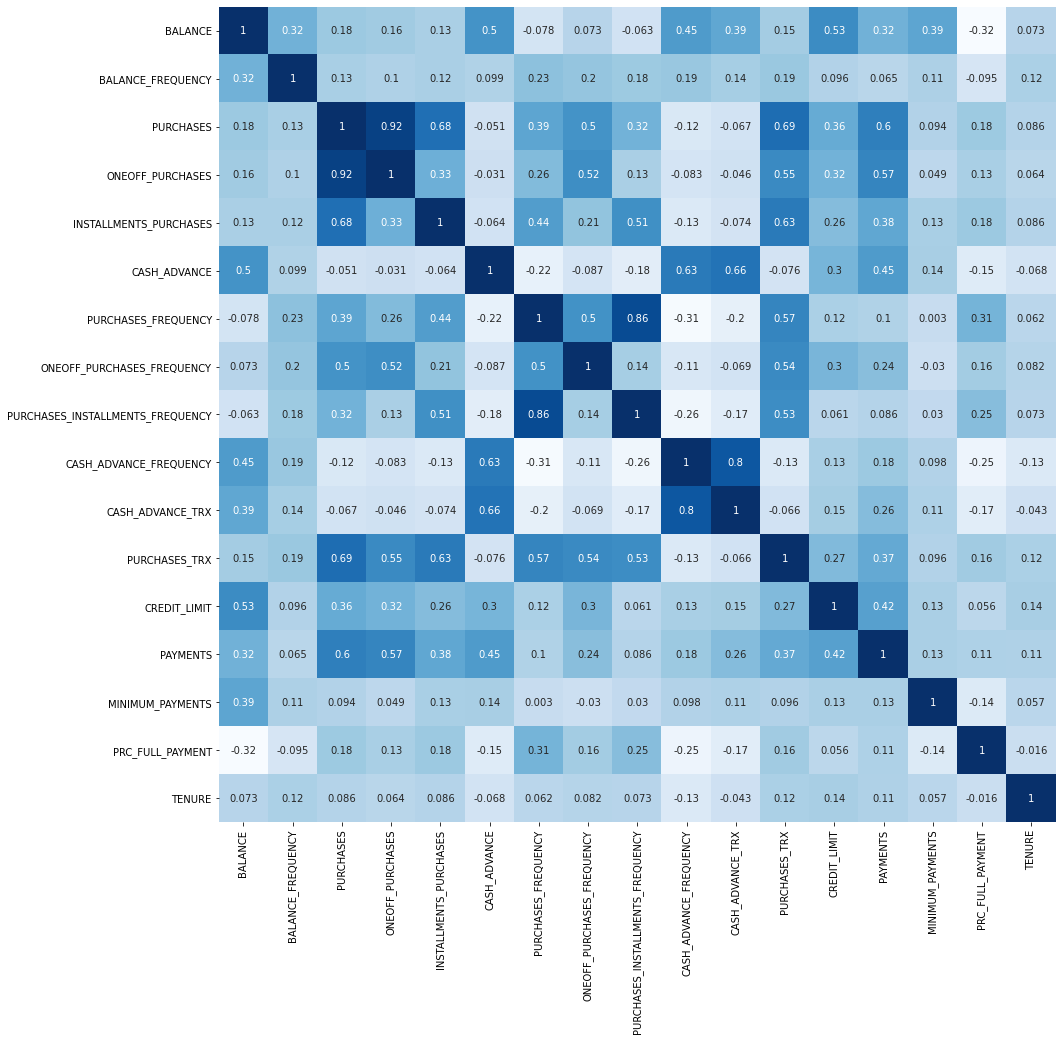

In [25]:
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cbar=False,cmap='Blues')
plt.show()

In [26]:
corr['PURCHASES']>0.75

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                            True
ONEOFF_PURCHASES                     True
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
Name: PURCHASES, dtype: bool

### Choosing optimal K using Elbow Method

In [27]:
std = StandardScaler()
df_std=std.fit_transform(df)

In [28]:
df_std.shape

(8950, 17)

In [29]:
wss=[]
cluster_list=list(range(1,20))
for x in cluster_list:
    kmeans=KMeans(n_clusters=x,init='k-means++',max_iter=300,n_init=10,random_state=42)
    kmeans.fit(df_std)
    wss.append(kmeans.inertia_)

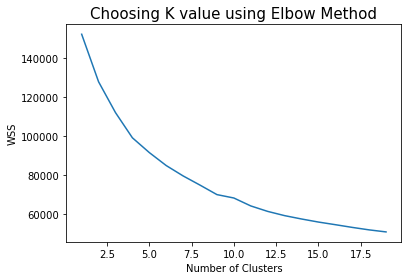

In [30]:
plt.plot(cluster_list,wss)
plt.title('Choosing K value using Elbow Method',fontsize=15)
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.show()

From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 

However, the values does not reduce linearly until 8th cluster. 

Lets choose the number of clusters to be 7 or 8.

In [42]:
kmeans=KMeans(n_clusters=7)
Y=kmeans.fit(df_std)
labels=kmeans.labels_

In [43]:
labels

array([4, 2, 1, ..., 5, 5, 5])

In [44]:
kmeans.cluster_centers_.shape

(7, 17)

In [45]:
cluster_centers=pd.DataFrame(data= kmeans.cluster_centers_,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.701543,-2.133587,-0.305982,-0.230503,-0.299905,-0.324030,-0.537637,-0.436587,-0.427520,-0.523134,-0.377605,-0.414550,-0.175050,-0.200441,-0.257489,0.288170,0.200378
1,-0.334704,0.355821,0.034105,-0.086242,0.238907,-0.368931,0.977065,0.202174,0.894029,-0.471010,-0.359643,0.233333,-0.143332,-0.178269,-0.071420,0.329473,0.271762
2,1.670262,0.394427,-0.213018,-0.149660,-0.228794,1.997526,-0.453162,-0.173879,-0.411955,1.911197,1.920768,-0.255415,1.015539,0.815151,0.547301,-0.392038,0.072241
3,0.531820,0.454536,1.802818,1.546058,1.422286,-0.238935,1.151771,1.790135,0.968731,-0.350796,-0.261536,2.106880,1.120891,0.974363,0.206485,0.467137,0.310091
4,0.017680,0.403825,-0.349363,-0.229858,-0.403660,-0.095187,-0.839608,-0.367781,-0.763808,0.099956,-0.031460,-0.474658,-0.298472,-0.246030,-0.010984,-0.455507,0.272879
5,-0.341141,-0.333100,-0.280989,-0.207459,-0.282905,0.060232,-0.171997,-0.271368,-0.207953,0.291927,-0.007982,-0.379541,-0.560480,-0.389957,-0.207857,0.021533,-3.178761
6,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863


In [46]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = std.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,104.272448,0.371844,349.469265,209.849357,139.867654,299.364326,0.274571,0.072215,0.194530,0.030460,0.671953,4.405676,3857.545446,1152.887104,264.138375,0.238000,11.785476
1,867.816785,0.961561,1076.071604,449.293747,627.107967,205.205499,0.882494,0.262770,0.719747,0.040890,0.794531,20.509608,3972.948069,1217.073361,697.764115,0.250080,11.881005
2,5040.983197,0.970707,548.088747,344.031670,204.171828,5167.775849,0.308475,0.150586,0.200716,0.517594,16.356659,8.361174,8189.395649,4092.926403,2139.669598,0.039050,11.613995
3,2671.412666,0.984946,4854.953568,3158.576248,1697.223583,477.814019,0.952612,0.736490,0.749436,0.064946,1.464034,67.078984,8572.708039,4553.828271,1345.412098,0.290344,11.932299
4,1601.273247,0.972933,256.785329,210.919964,46.043187,779.260264,0.153375,0.092742,0.060880,0.155146,3.034136,2.911606,3408.486046,1020.912472,838.609324,0.020487,11.882501
5,854.418008,0.798362,402.868166,248.098605,155.239781,1105.181375,0.421320,0.121503,0.281791,0.193562,3.194357,5.275862,2455.195062,604.255929,379.804248,0.160013,7.263323
6,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333


* First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%

* Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)

* Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits

* Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 

In [47]:
labels.shape

(8950,)

In [48]:
labels.max()

6

In [49]:
labels.min()

0

In [57]:
y_kmeans = kmeans.fit_predict(df_std)
y_kmeans

array([3, 1, 0, ..., 5, 5, 5])

In [58]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


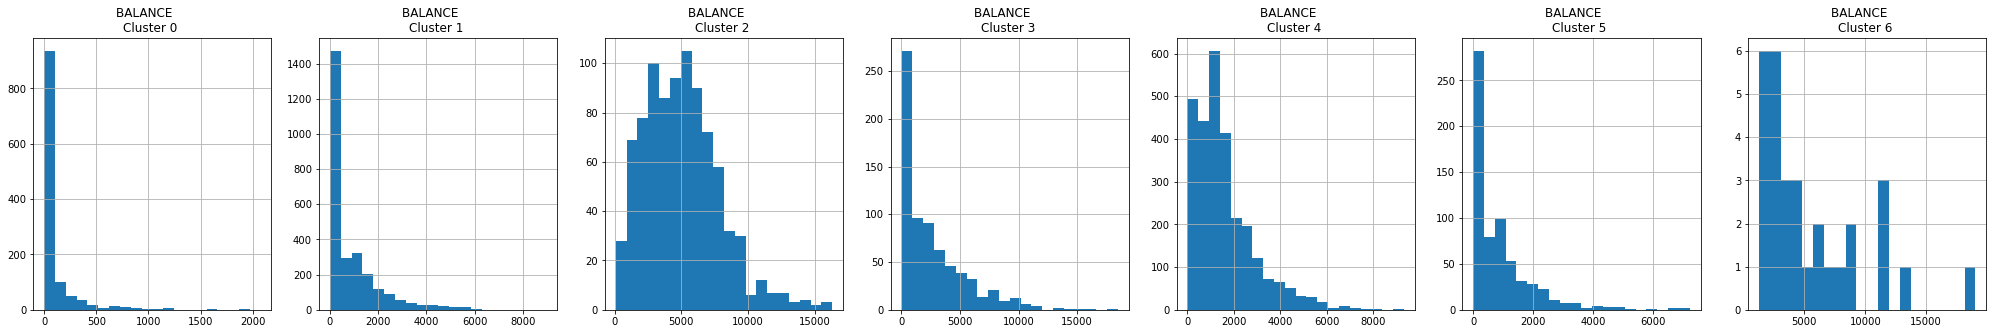

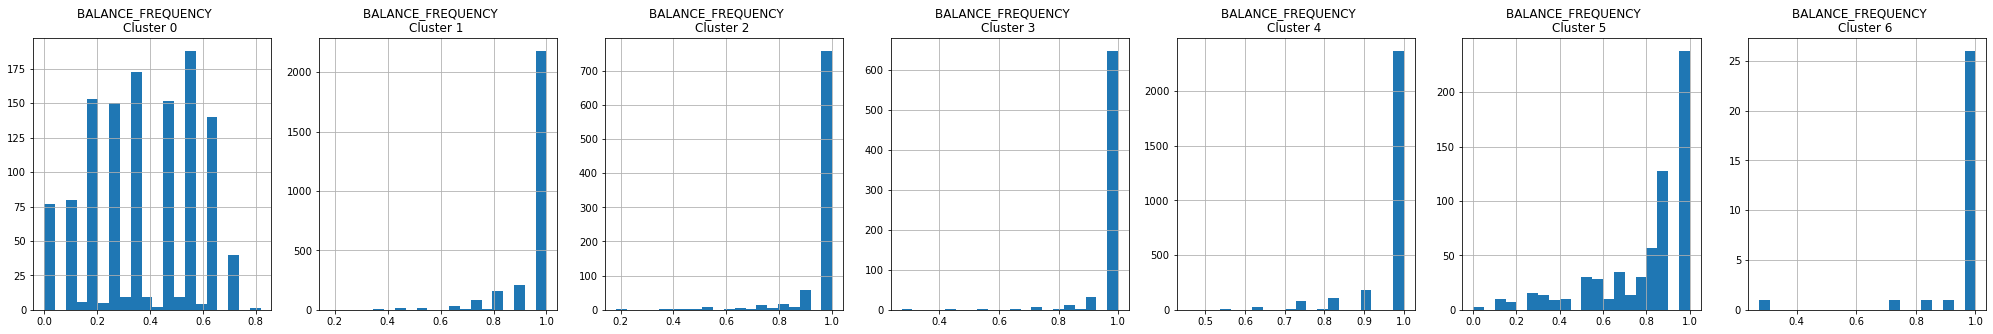

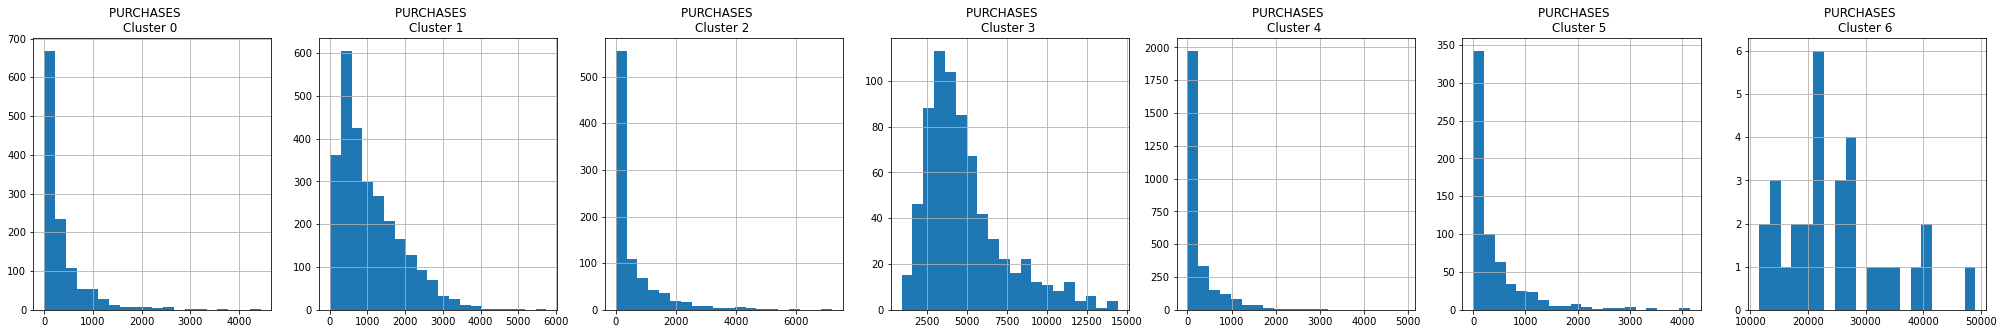

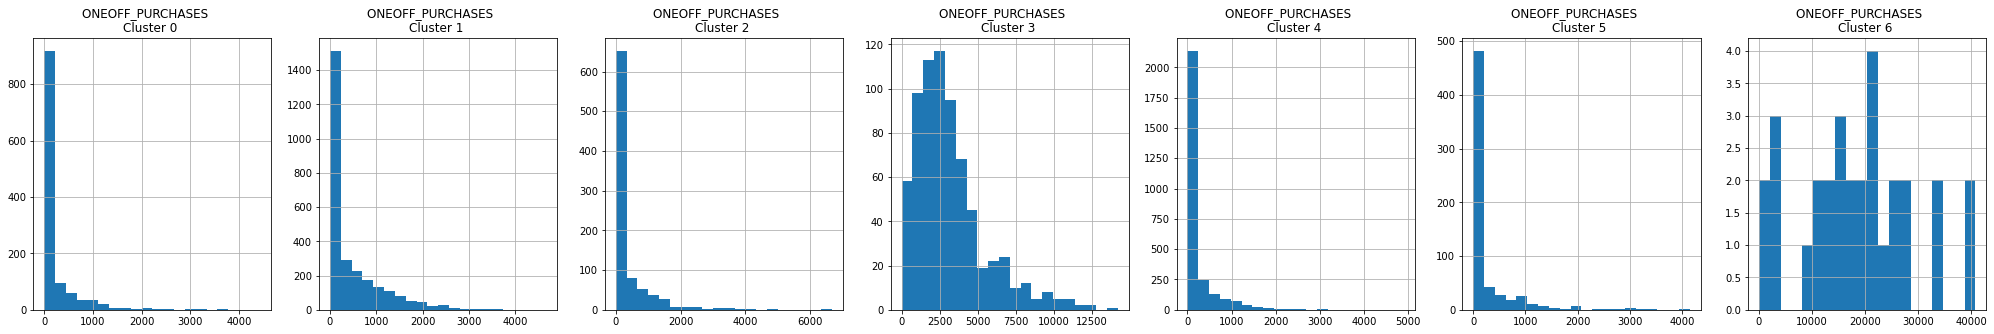

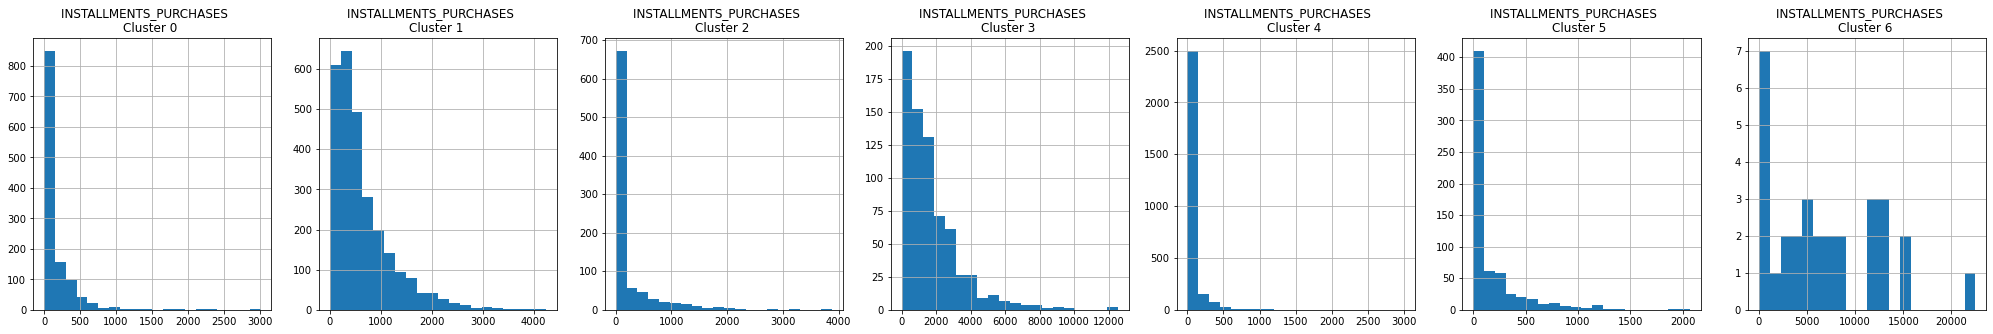

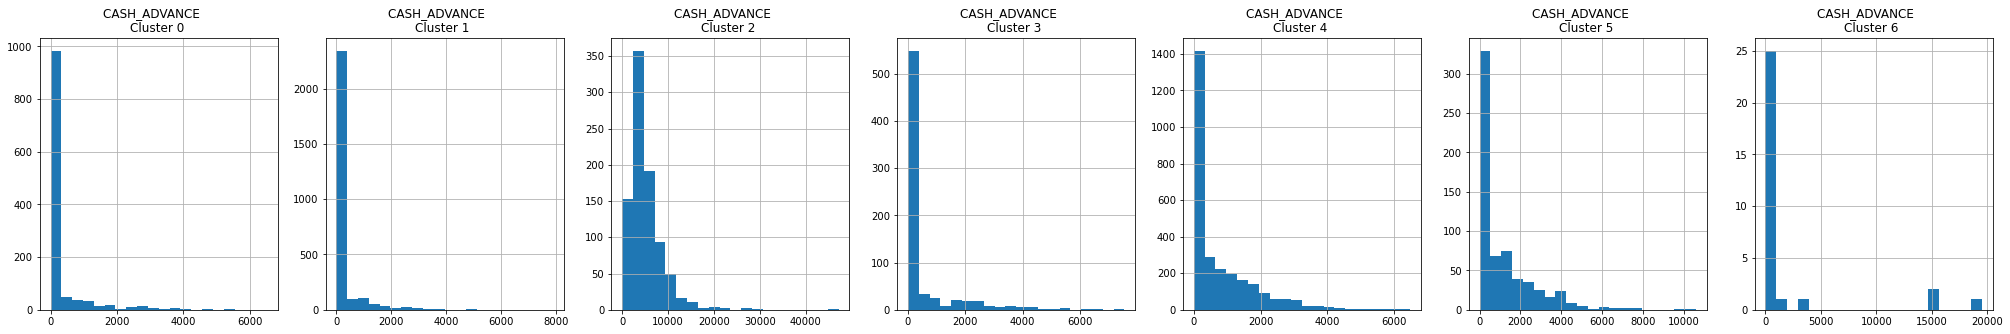

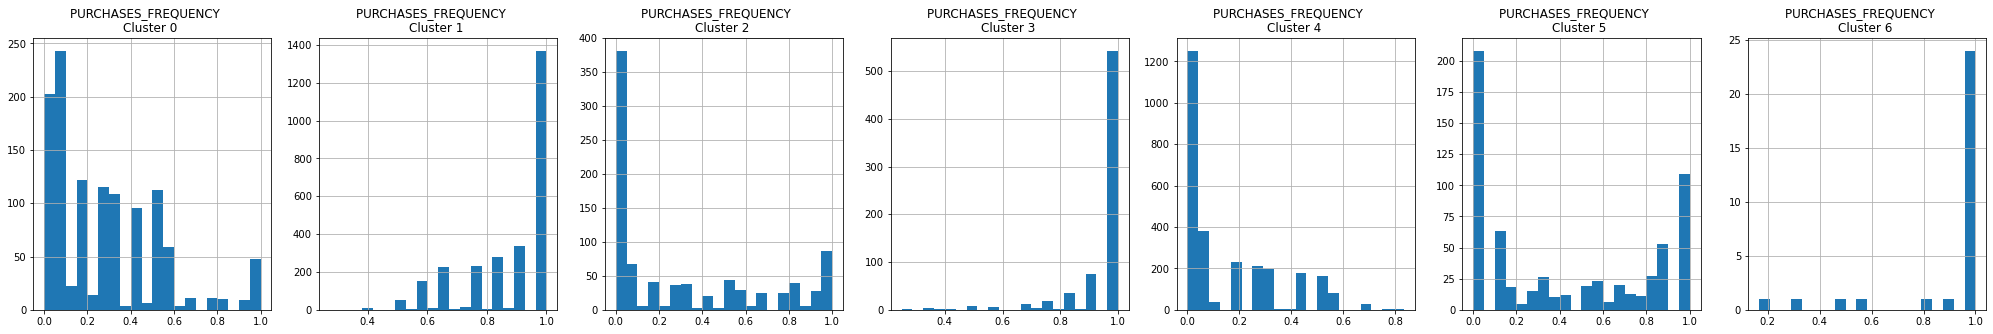

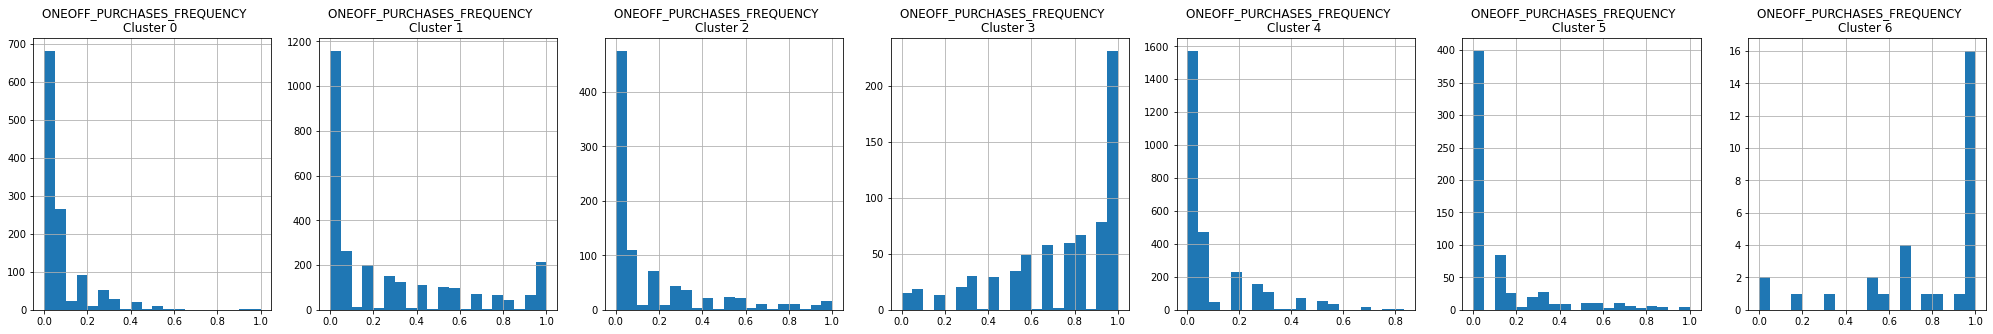

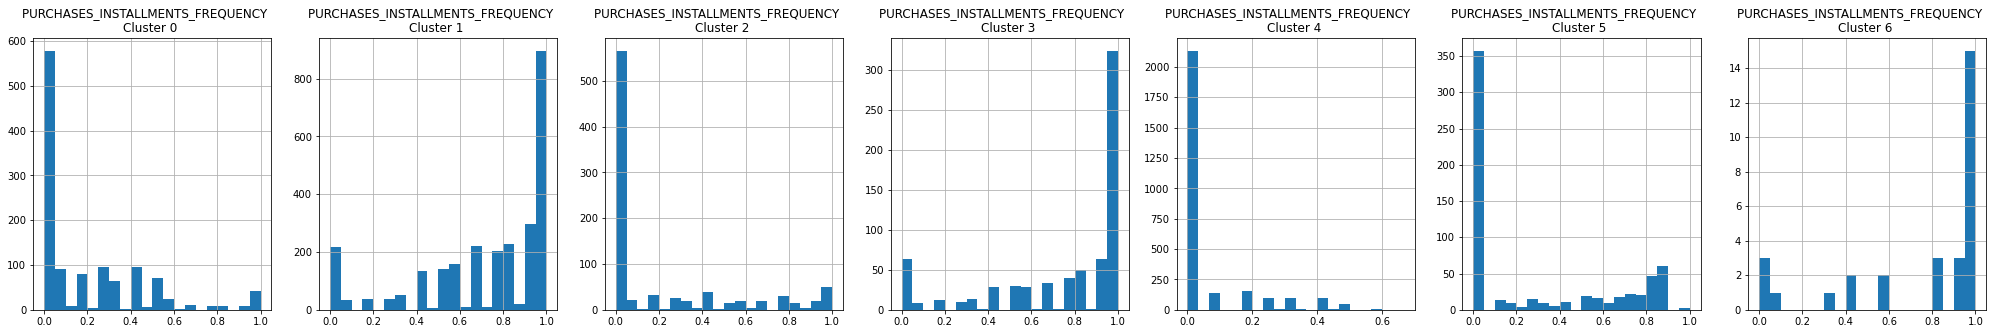

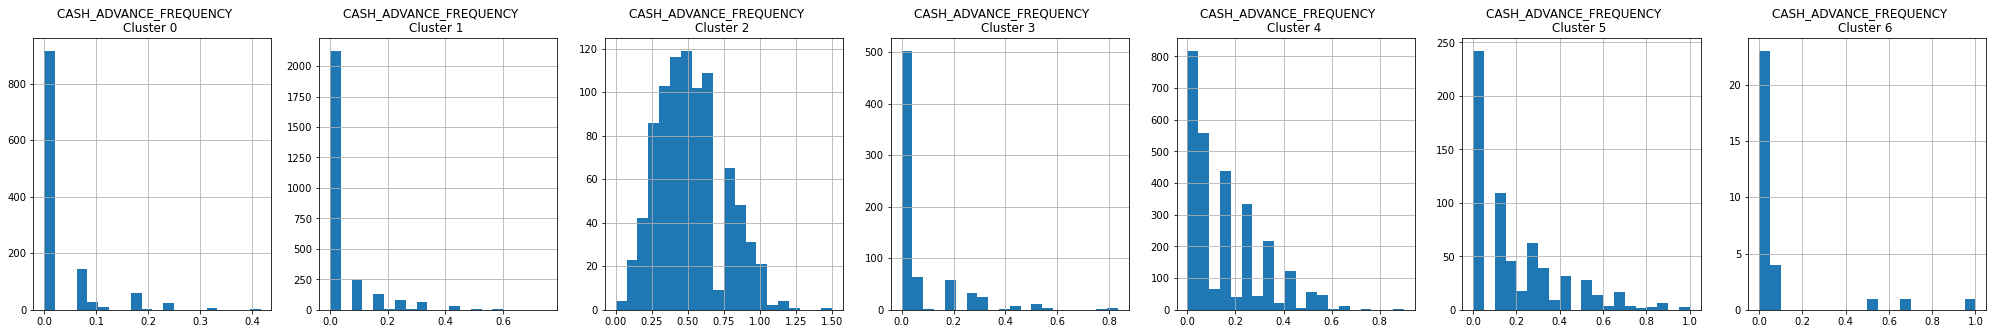

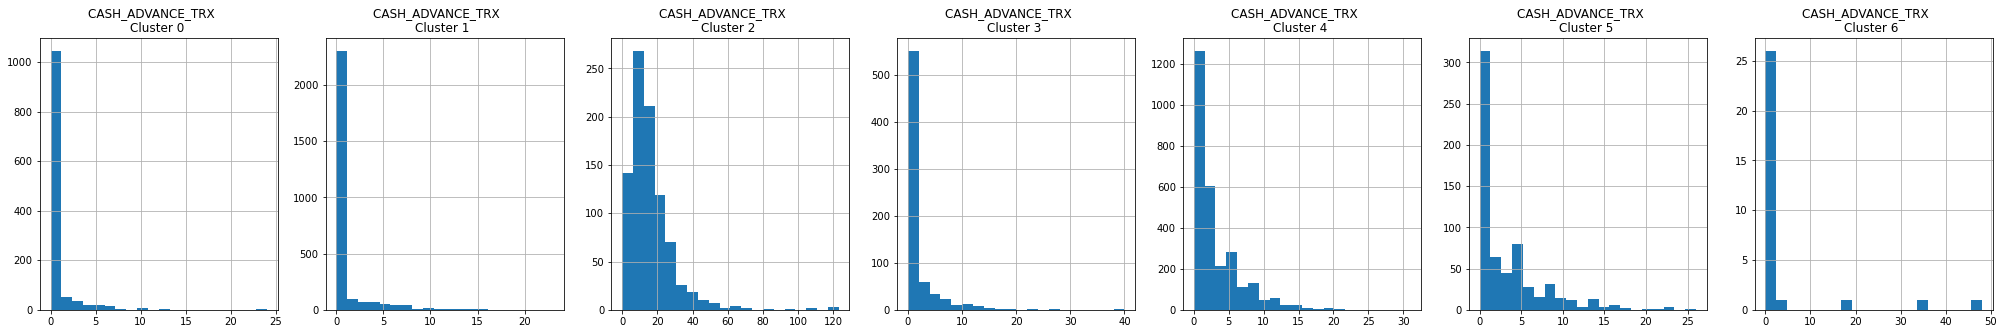

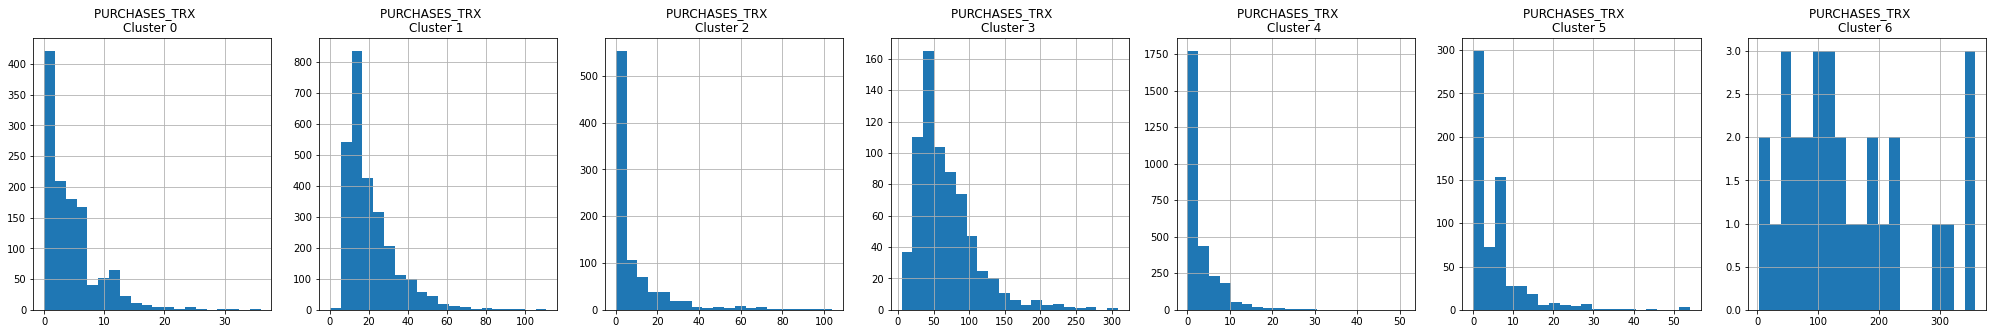

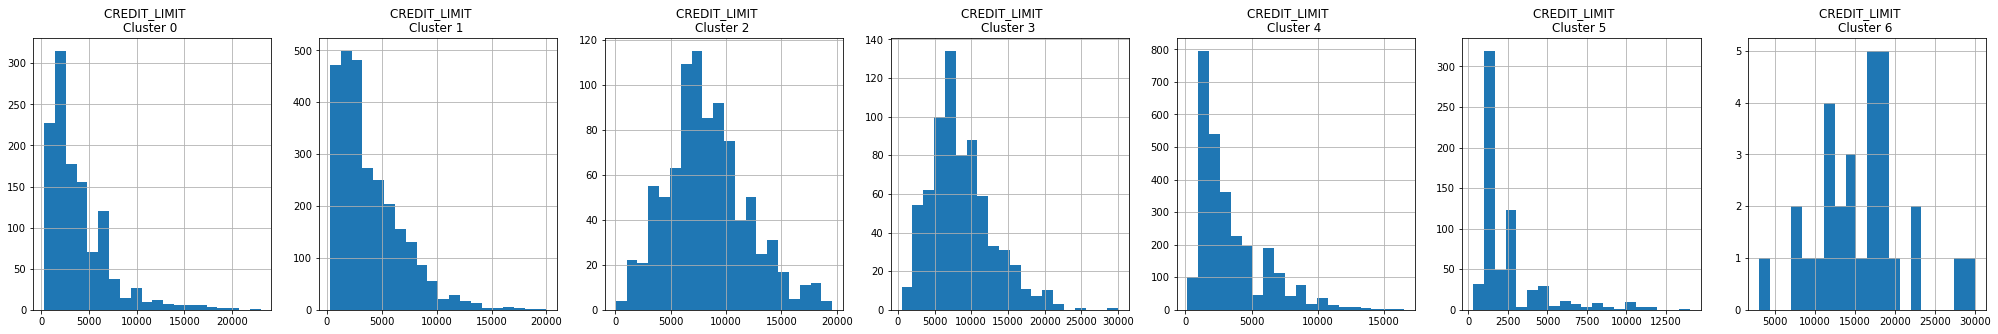

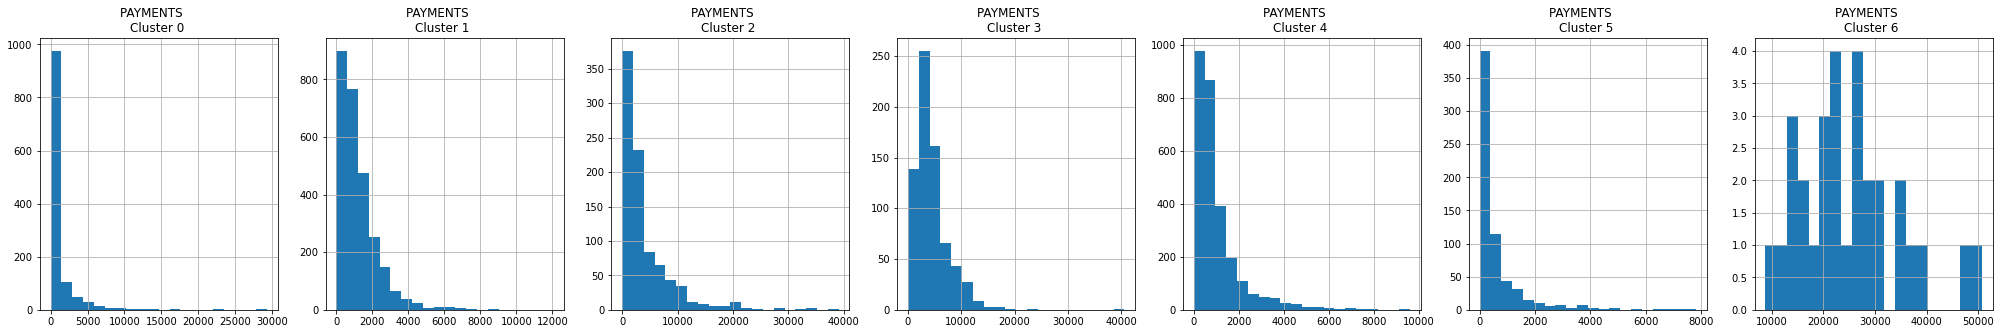

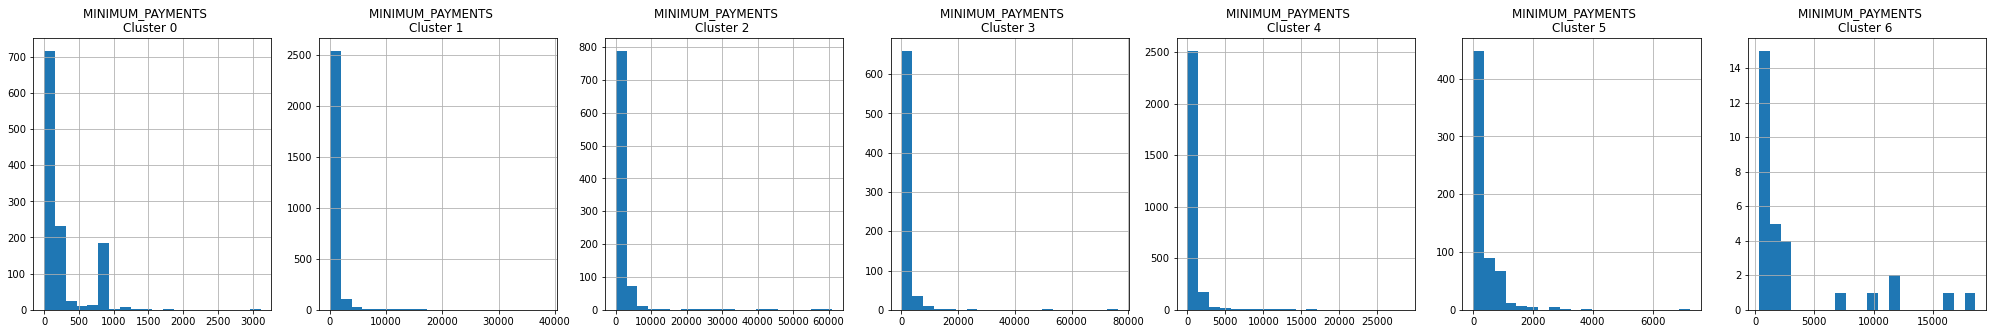

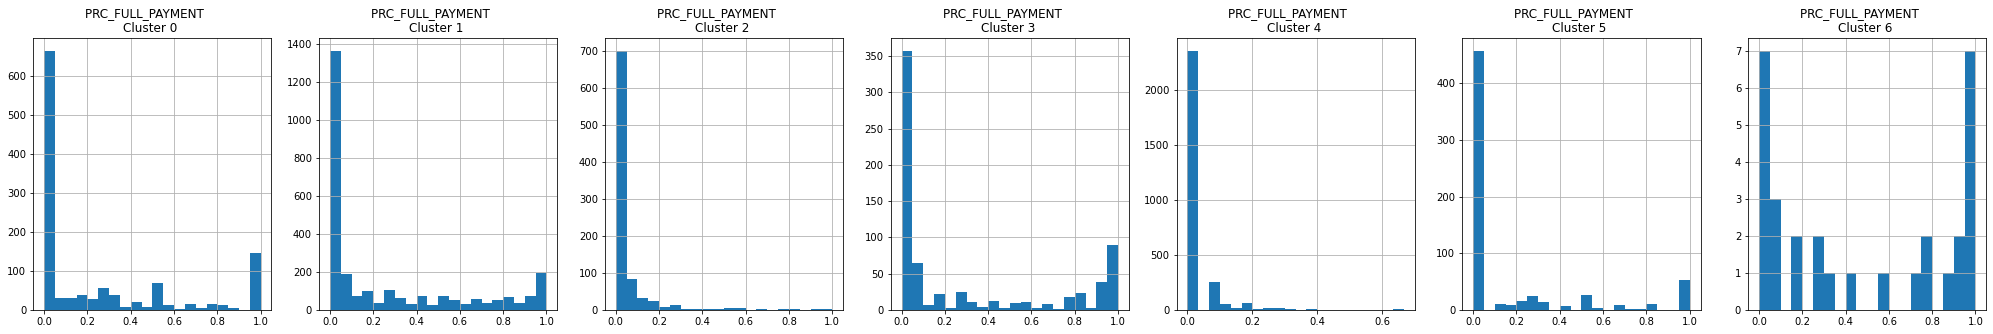

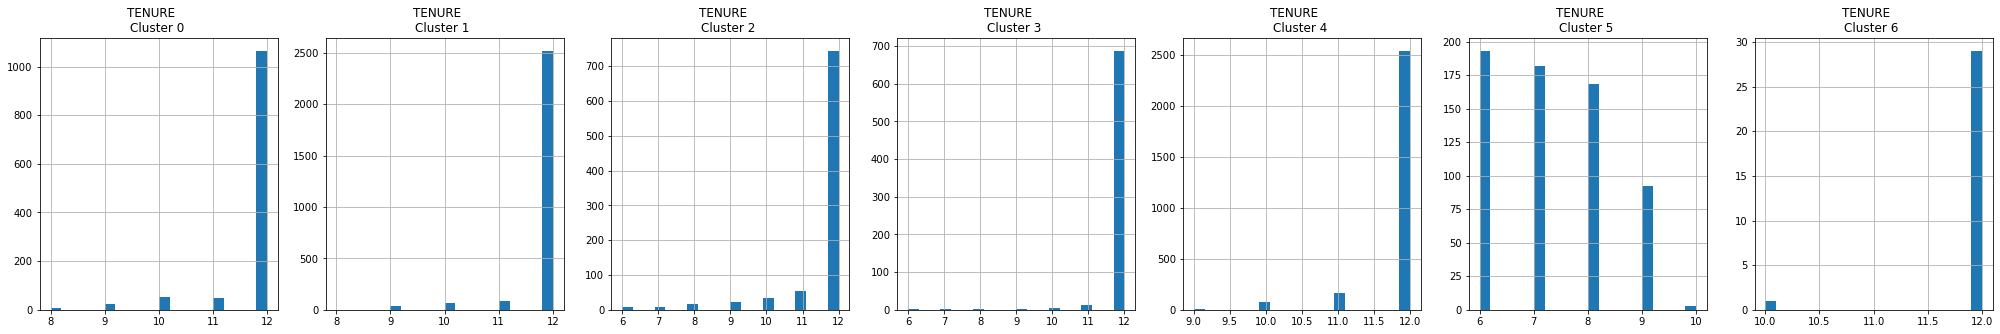

In [60]:
# Plot the histogram of various clusters
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

### PCA

In [61]:
pca=PCA(n_components=2)

In [64]:
principal_comp=pca.fit_transform(df_std)
principal_comp

array([[-1.68222005, -1.07644822],
       [-1.13829387,  2.50648817],
       [ 0.96968056, -0.38351863],
       ...,
       [-0.92620368, -1.81078814],
       [-2.3365508 , -0.65797094],
       [-0.5564229 , -0.40047272]])

In [65]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()


,pca1,pca2
0,-1.682220,-1.076448
1,-1.138294,2.506488
2,0.969681,-0.383519
3,-0.873627,0.043172
4,-1.599434,-0.688581


In [66]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076448,4
1,-1.138294,2.506488,2
2,0.969681,-0.383519,1
3,-0.873627,0.043172,4
4,-1.599434,-0.688581,4


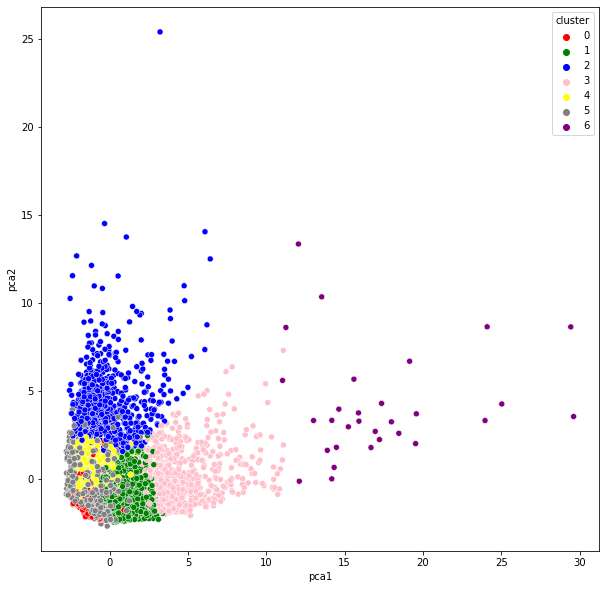

In [67]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()